In [1]:
# Importando las bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Entendiendo los datos
df = pd.read_csv("preu lloguer per trimestre i barri.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


<h2>Pre processing</h2>
The next steps are going to focus on price: select the type of price and convert to integers as follow.

Price is a important feature in this dataset and there are two types of it:

In [3]:
df['Lloguer_mitja'].value_counts()

Lloguer_mitja
Lloguer mitjà mensual (Euros/mes)              292
Lloguer mitjà per superfície (Euros/m2 mes)    292
Name: count, dtype: int64

We are going to work just with the rental prices and not with the square feet prices what would be a new analysis, so we select them as:

In [4]:
df = df[df["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]

Now, let's analyze the values of price that are not numbers and after that let's convert the Price column to numeric, because as we could see above price in this dataset is a object: 7   Preu            584 non-null    object

In [5]:
df[df['Preu'] == '--'].head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),--
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),--
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),--


In [6]:
# converting price from object to numeric
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce') 
df[df['Preu'].isna()].head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN


The errors='coerce' deals with strange values ('--') substituting them for Nan as we can see that now doens't exist prices equal to '--':

In [7]:
df[df['Preu'] == '--'].head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu


<h2>Ejercicio 1 y 2</h2>
Crea al menos una visualización para: <br>
<ol>
<li>Una variable categórica (Distrito o Barrio) </li>
<li>Una variable numérica (Precio) 
<li>Una variable numérica y una categórica (Distrito y Precio) 
<li>Dos variables numéricas (Año o Trimestre y Precio)
<li>Tres variables (Barrio o Distrito, Trimestre y Precio)
<ol>

<h3>Una visualización para una variable categorical (districto)</h3>

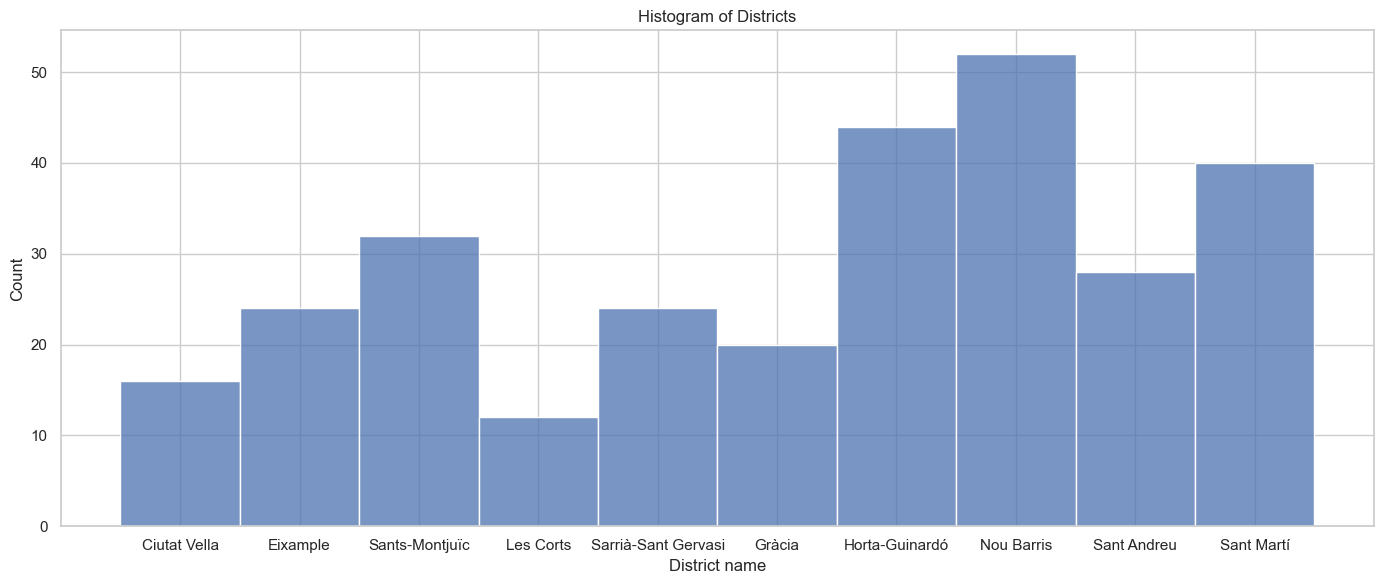

In [8]:
# Crea al menos una visualización para: una variable categorical (districto)
# print(df['Nom_Districte'].value_counts()) # contamos cuantas muestras de datos por districto existen
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.histplot(df['Nom_Districte'])

plt.xlabel('District name')
plt.title('Histogram of Districts')

plt.tight_layout()
plt.savefig("1-Histogram of Districts")
plt.show()

<h3>Una visualización para una variable numérica (Preu) </h3>
Aqui tenemos dos visualizaciones: histograma y un box plot de los precios.

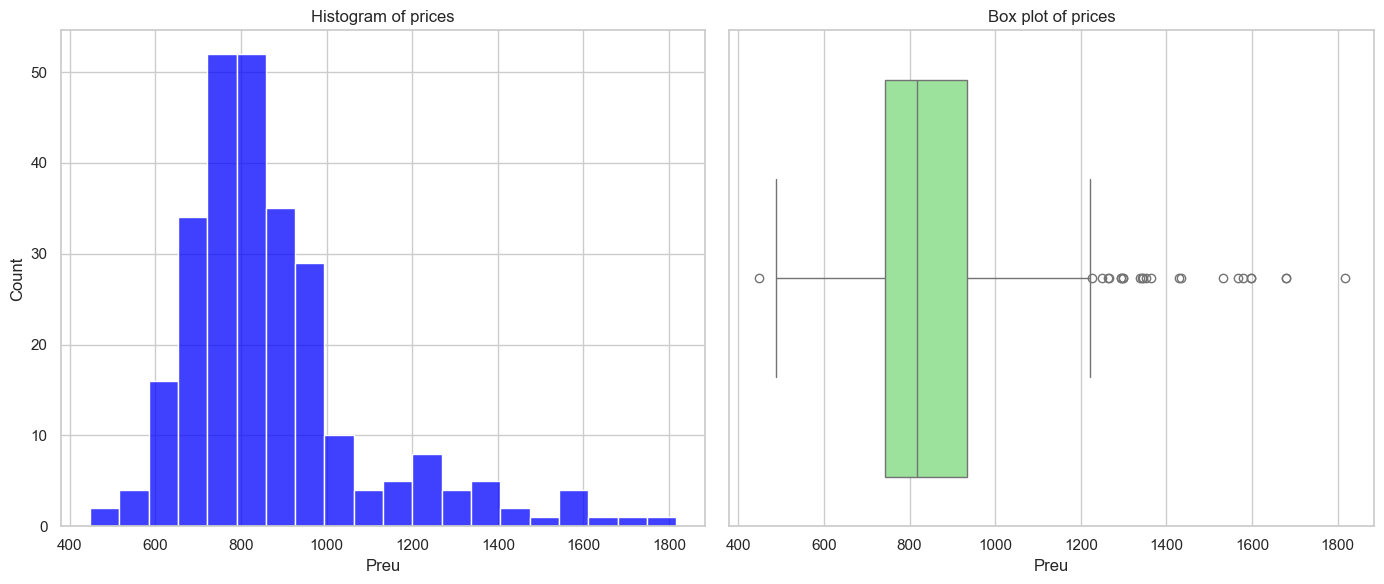

In [9]:
# Crea al menos una visualización para: una variable numérica (Preu)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Preu'], bins = 20, kde=False, color='blue')
plt.title('Histogram of prices')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Preu'], color='lightgreen')
plt.title('Box plot of prices')

plt.tight_layout()
plt.savefig("2-Histogram and box plot of prices")
plt.show()

<h3>Una visualización para una variable numérica y categórica (Distrito y Precio) </h3>

Error bar:  ('ci', 95)


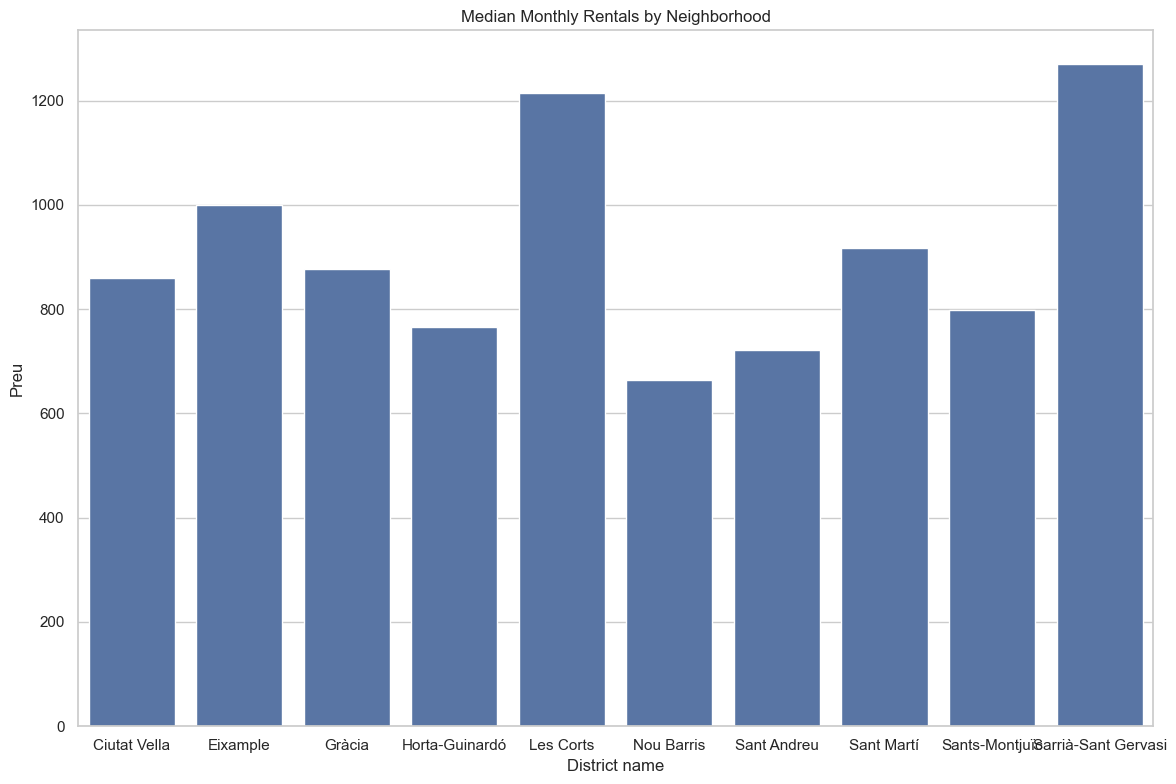

In [10]:
# Crea una visualización para una variable numérica y categórica (Distrito y Precio)
mean_rental_per_neighborhood = df.groupby('Nom_Districte')['Preu'].mean()
mean_rental_per_neighborhood = mean_rental_per_neighborhood.reset_index() # convert series to dataframe to seaborn

plt.figure(figsize=(12, 8))
sns.barplot(x='Nom_Districte', y='Preu', data=mean_rental_per_neighborhood)
plt.xlabel('District name')
plt.title('Median Monthly Rentals by Neighborhood')
plt.tight_layout()
plt.savefig("3-Median Monthly Rentals by Neighborhood")
plt.show()

<h3>Una visualización para dos variables numéricas (Año y Precio; Trimestre y Precio)</h3>


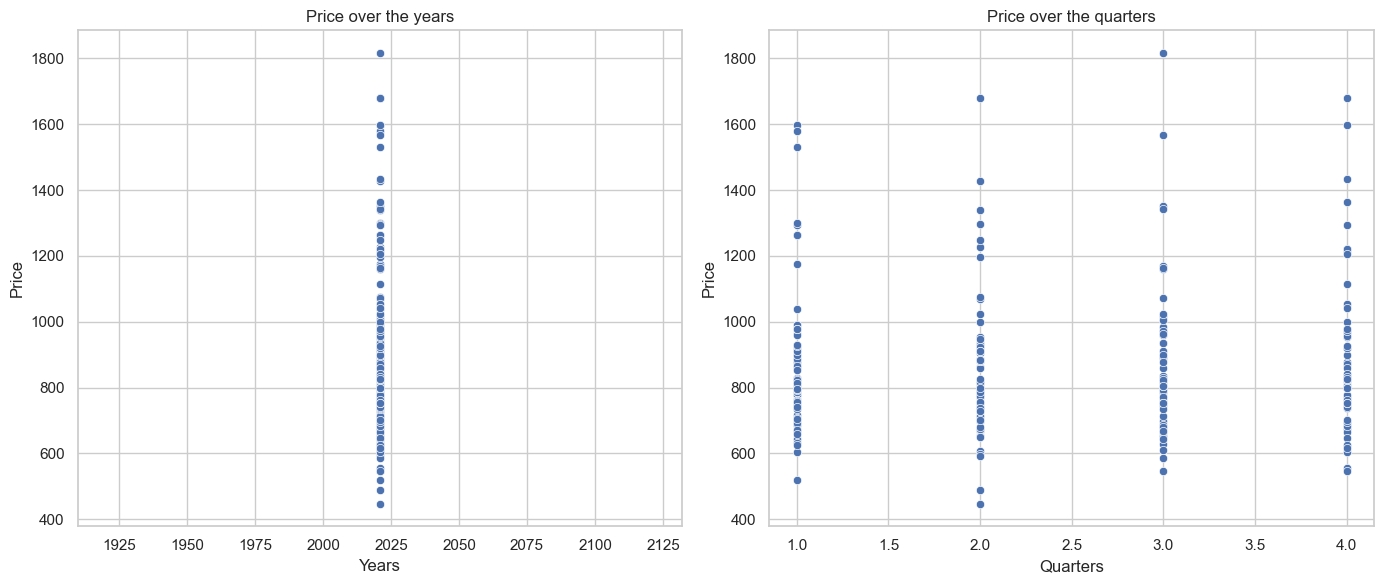

In [11]:
# Crea una visualización para dos variables numéricas (Año y Precio y Trimestre y Precio)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Any', y='Preu')
plt.xlabel('Years')
plt.ylabel('Price')
plt.title('Price over the years')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Trimestre', y='Preu')
plt.xlabel('Quarters')
plt.ylabel('Price')
plt.title('Price over the quarters')
plt.tight_layout()
plt.savefig("4-Price over the years and the quarters")
plt.show()



The graph above does not give much information, so we are going to plot a lineplot of the price over the quarters:

Error bar:  None


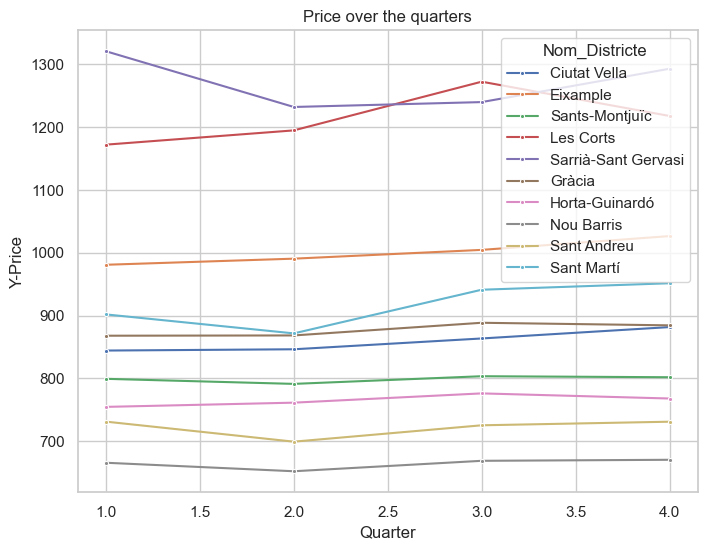

In [12]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Trimestre',
             y='Preu',
             hue='Nom_Districte', # Create n line plots according to labels in 'Nom_Districte'
             data=df,
             marker='.',
             errorbar=None #without the confidence level
            )
plt.xlabel('Quarter') # x-axis name
plt.ylabel('Y-Price') # y-axis name
plt.title('Price over the quarters') # Add a title
plt.show() # Display the graph

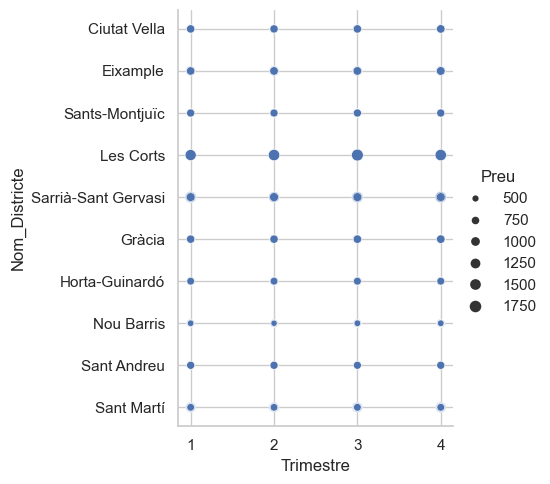

In [13]:
# Crea una visualización para tres variables (Distrito, Trimestre y Precio)
sns.relplot(data=df, x='Trimestre', y='Nom_Districte', size='Preu')
plt.savefig('5-District x Quarter x Price')

The graph above doesn't provide much information. With that we can realize that the price is almost the same along the quarters and that Les Corts is the most expensive. Nonetheless, the graph the line plot before and the heatmap next bring much more information.

<h2>Ejercicio 3</h2>
Propone alguna visualización que creas que puede resultar interesante. <br>
Vamos hacer 3 visualizaciones: PIE chart, Boxplot y Heatmap :)

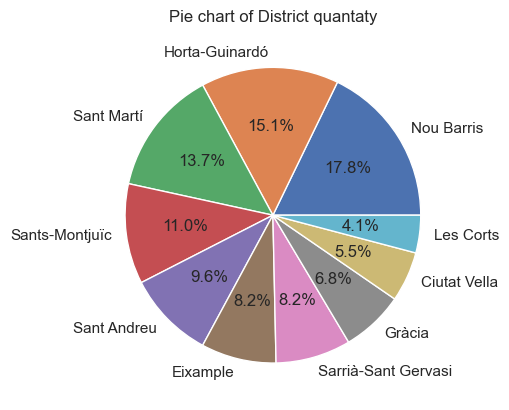

In [14]:
# Pie chart of District quantaty
quantaty_districts = df['Nom_Districte'].value_counts()
plt.pie(quantaty_districts, labels=quantaty_districts.index, autopct='%1.1f%%')
plt.title('Pie chart of District quantaty')
plt.savefig('6-Pie chart of District quantaty')

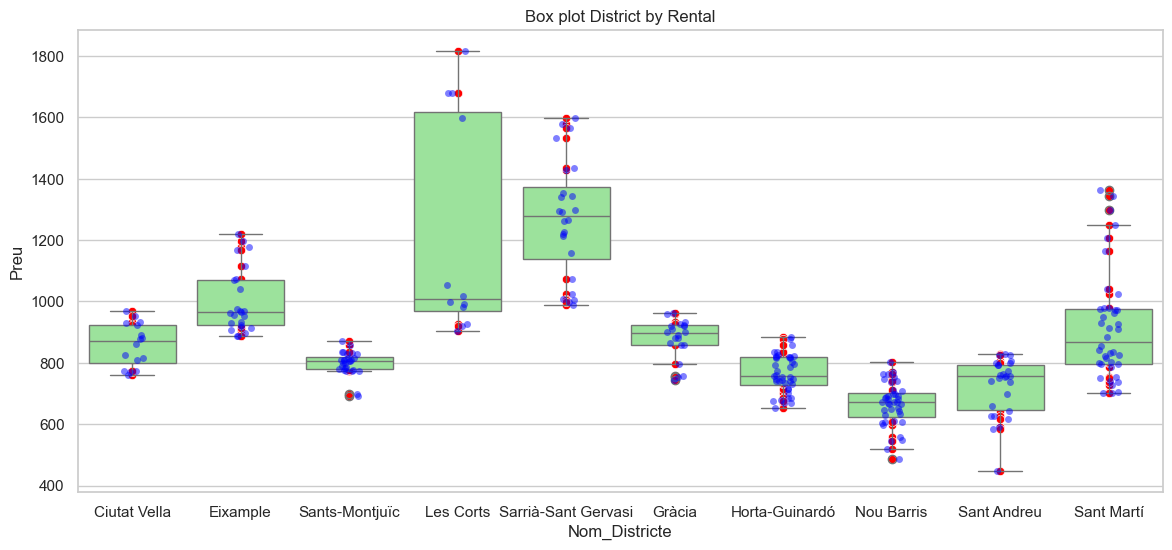

In [24]:
# Box plot District by Rental
plt.figure(figsize=(14, 6))
plt.title('Box plot District by Rental')
sns.boxplot(data=df, x="Nom_Districte", y="Preu", color="lightgreen")
sns.scatterplot(data=df, x='Nom_Districte', y='Preu', color='red')
sns.stripplot(data=df, x="Nom_Districte", y="Preu", orient='v', color='blue', alpha= 0.5)
plt.savefig('7-Box plot District by Rental')

<Axes: xlabel='Nom_Districte', ylabel='Preu'>

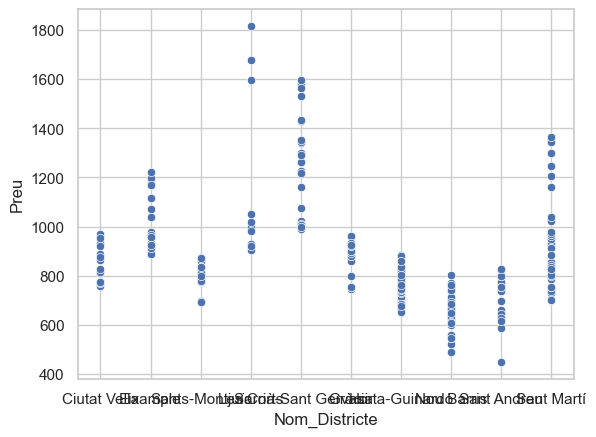

In [17]:
# Não sei por que o scaterplot não plota dentro do boxplot, mesmo tendo valores. 
sns.scatterplot(data=df, x='Nom_Districte', y='Preu')

In [16]:
df[df.Nom_Districte == 'Ciutat Vella']

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
146,2021,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),774.2
147,2021,2,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),934.1
148,2021,2,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),814.8
149,2021,2,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),862.1
292,2021,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),770.5
293,2021,3,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),968.4


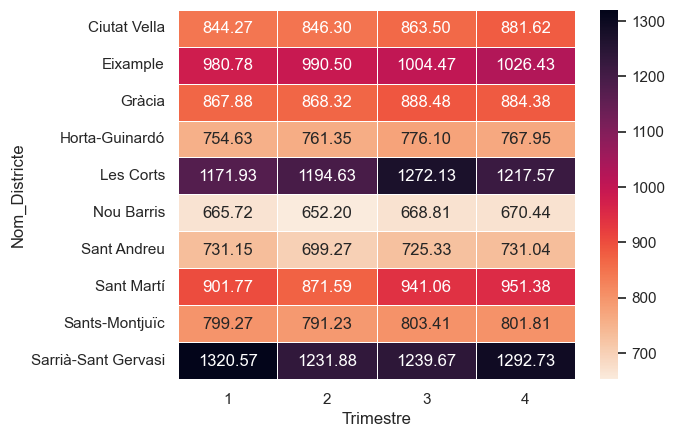

In [155]:
# Heatmap
pivot_data = df.pivot_table(values='Preu', index='Nom_Districte', columns='Trimestre', aggfunc='mean')
ax=sns.heatmap(pivot_data, annot=True, fmt=".2f", linewidth=.5, cmap="rocket_r")
plt.title('Heatmap of price over quarters')
plt.savefig('8-Heatmap of price over quarters')